In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def clm(x, y, yres, k, a = 1):
    x_next = 4 * a * x * (1 - x)
    y_next = (4 * a * y * (1 - y)) * (1 - k) + (4 * a * k * x * (1 - x))
    yres_next = (4 * a * yres * (1 - yres)) * (1 - k) + (4 * a * k * x * (1 - x))
    return x_next, y_next, yres_next

# Linear Stability Analysis

## Between $x$ and $y$

In [4]:
def j(x, y, a, k):
  return np.array([[4 * a * (1 - 2 * x), 0],
                      [k * 4 * a * (1 - 2 * x), 4 * a * (1 - 2 * y) * (1 - k)]])

In [5]:
# Real fixed points
fp = (0, 0)
eigen = np.linalg.eigvals(j(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for first real fixed point:', eigen) # Unstable

Eigenvalues for first real fixed point: [2. 4.]


In [6]:
fp = (0, 0.5)
eigen = np.linalg.eigvals(j(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for second real fixed point:', eigen) # Unstable

Eigenvalues for second real fixed point: [0. 4.]


In [9]:
# Complex fixed points
fp = (0.75, 0.25 + 0.25*np.sqrt(2)*1j)
eigen = np.linalg.eigvals(j(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for first complex fixed point:', eigen) # Unstable

Eigenvalues for first complex fixed point: [ 1.-1.41421356j -2.+0.j        ]


In [8]:
fp = (0.75, 0.25 - 0.25*np.sqrt(2)*1j)
eigen = np.linalg.eigvals(j(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for first complex fixed point:', eigen) # Unstable

Eigenvalues for first complex fixed point: [ 1.+1.41421356j -2.+0.j        ]


## Between $y$ and $y'$

In [10]:
def j1(yres, y, a, k):
  return np.array([[4 * a * (1 - 2 * y), 0],
                      [0, 4 * a * (1 - 2 * yres)]])

In [11]:
# Real fixed points
fp = (0, 0)
eigen = np.linalg.eigvals(j1(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for first real fixed point:', eigen) # Unstable

Eigenvalues for first real fixed point: [4. 4.]


In [12]:
fp = (0, 0.5)
eigen = np.linalg.eigvals(j1(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for second real fixed point:', eigen) # Unstable

Eigenvalues for second real fixed point: [0. 4.]


In [123]:
fp = (0.5, 0.5)
eigen = np.linalg.eigvals(j1(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for second real fixed point:', eigen) # Unstable

Eigenvalues for second real fixed point: [0. 0.]


In [124]:
fp = (0.5, 0)
eigen = np.linalg.eigvals(j1(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for second real fixed point:', eigen) # Unstable

Eigenvalues for second real fixed point: [4. 0.]


In [125]:
# Complex fixed points
fp = (0.25 + 0.25*np.sqrt(2)*1j, 0.25 + 0.25*np.sqrt(2)*1j)
eigen = np.linalg.eigvals(j(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for first complex fixed point:', eigen) # Unstable

Eigenvalues for first complex fixed point: [1.-1.41421356j 2.-2.82842712j]


In [126]:
fp = (0.25 + 0.25*np.sqrt(2)*1j, 0.25 - 0.25*np.sqrt(2)*1j)
eigen = np.linalg.eigvals(j(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for first complex fixed point:', eigen) # Unstable

Eigenvalues for first complex fixed point: [1.+1.41421356j 2.-2.82842712j]


In [127]:
fp = (0.25 - 0.25*np.sqrt(2)*1j, 0.25 - 0.25*np.sqrt(2)*1j)
eigen = np.linalg.eigvals(j(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for first complex fixed point:', eigen) # Unstable

Eigenvalues for first complex fixed point: [1.+1.41421356j 2.+2.82842712j]


In [128]:
fp = (0.25 - 0.25*np.sqrt(2)*1j, 0.25 + 0.25*np.sqrt(2)*1j)
eigen = np.linalg.eigvals(j(fp[0], fp[1], 1, 0.5))
print('Eigenvalues for first complex fixed point:', eigen) # Unstable

Eigenvalues for first complex fixed point: [1.-1.41421356j 2.+2.82842712j]


### Not useful doing linear stability analysis as this is local.

# Bifurcation Analysis

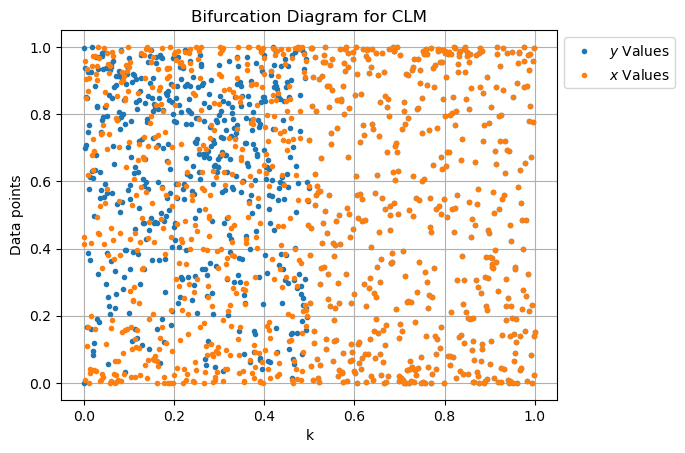

In [3]:
def bifurcation_diagram(a, k_min, k_max, num_k, num_iterations, num_discard):
    k_values = np.linspace(k_min, k_max, num_k)
    y_values = []
    x_values = []

    for k in k_values:
        x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
        for i in range(num_iterations):
            x, y, yres = clm(x, y, yres, k, a)
        for i in range(num_discard):
            x, y, yres = clm(x, y, yres, k, a)
        y_values.append(y)
        x_values.append(x)

    # plt.figure(figsize=(10, 6))
    plt.plot(k_values, y_values, '.', label = r'$y$ Values')
    plt.plot(k_values, x_values, '.', label = r'$x$ Values')
    plt.xlabel('k')
    plt.ylabel('Data points')
    plt.title('Bifurcation Diagram for CLM')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show()

bifurcation_diagram(1, 0, 1, 1000, 1000, 100)

In [4]:
# Parameters
a = 1
n_iterations = 10000
n_last = 150  # Number of last iterations to plot to see the long-term behaviour
k_values = np.linspace(0, 1, 400)

x_vals, y_vals, yres_vals = [], [], []

In [5]:
for k in k_values:
    x, y, yres = np.random.uniform(0.1, 0.9), np.random.uniform(0.1, 0.9), np.random.uniform(0.1, 0.9)

    for i in range(n_iterations):
        x, y, yres = clm(x, y, yres, k, a)

    for i in range(n_last):
        x, y, yres = clm(x, y, yres, k, a)
        x_vals.append((k, x))
        y_vals.append((k, y))
        yres_vals.append((k, yres))

x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
yres_vals = np.array(yres_vals)

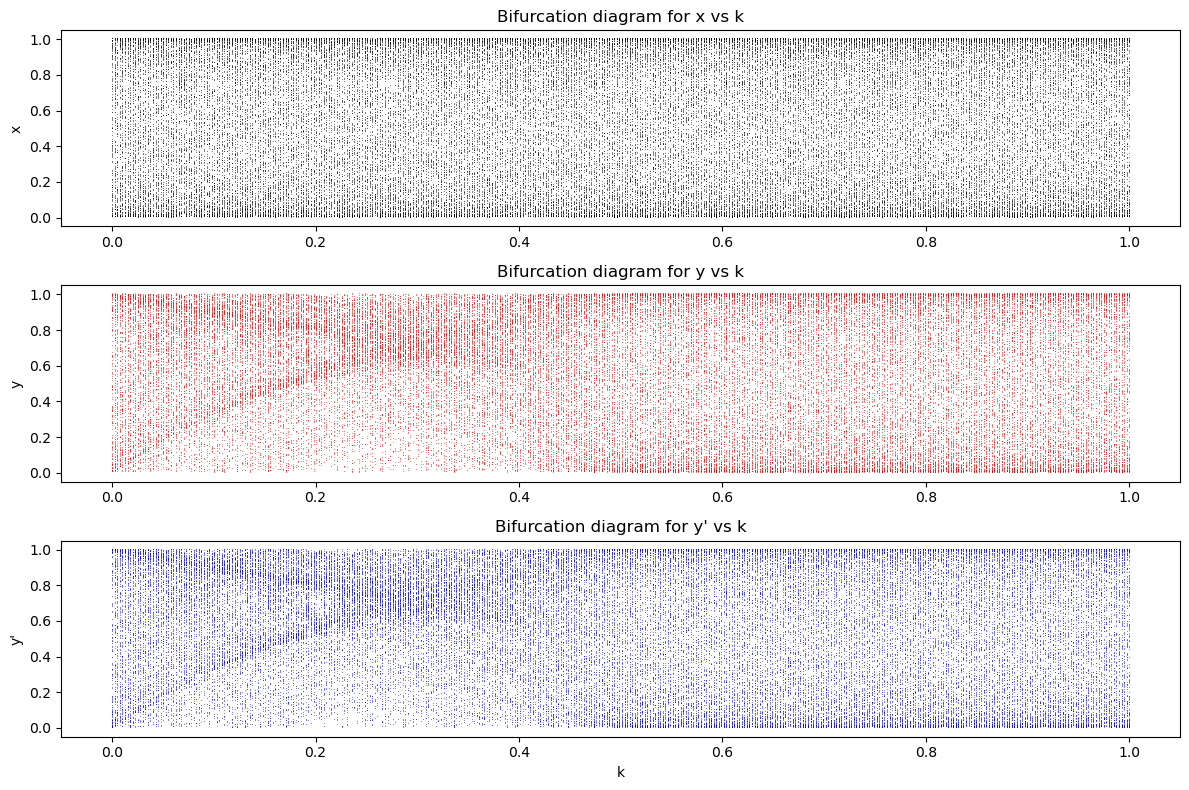

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x_vals[:, 0], x_vals[:, 1], ',k', alpha=0.5)
plt.title('Bifurcation diagram for x vs k')
plt.ylabel('x')

plt.subplot(3, 1, 2)
plt.plot(y_vals[:, 0], y_vals[:, 1], ',r', alpha=0.5)
plt.title('Bifurcation diagram for y vs k')
plt.ylabel('y')

plt.subplot(3, 1, 3)
plt.plot(yres_vals[:, 0], yres_vals[:, 1], ',b', alpha=0.5)
plt.title("Bifurcation diagram for y' vs k")
plt.ylabel("y'")
plt.xlabel('k')

plt.tight_layout()
plt.show()